# Forecast using STL

In [4]:
from Energy.HelpFunctions.get_energy_data import get_energy_data, prepare_data
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

from statsmodels.tsa.seasonal import MSTL

df = get_energy_data()
df = prepare_data(df)

start_date = pd.to_datetime("2020-01-01")
end_date = pd.to_datetime("2023-12-31")

mask = (df.index >= start_date) & (df.index < end_date)
df = df[mask]

In [5]:
from sktime.datasets import load_airline
from sktime.forecasting.statsforecast import StatsForecastMSTL

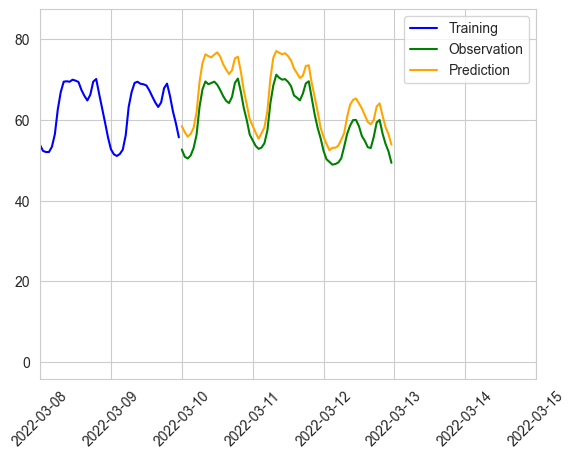

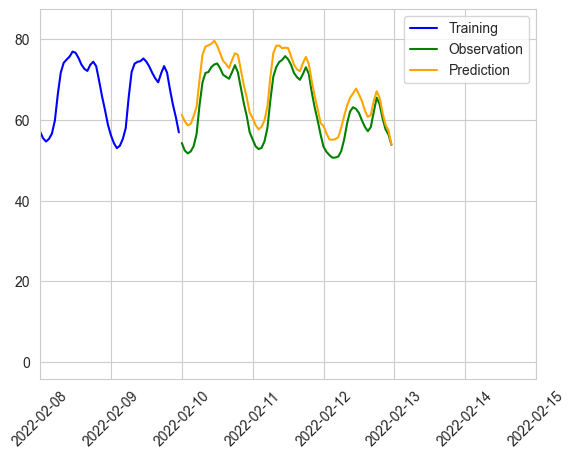

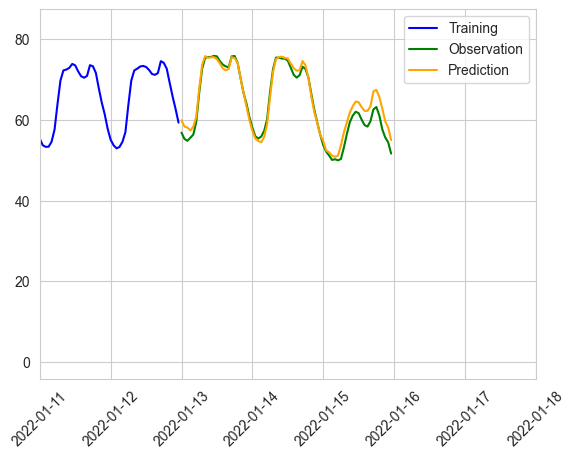

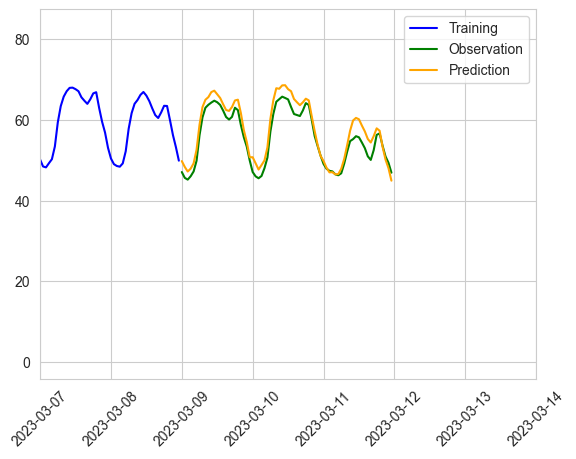

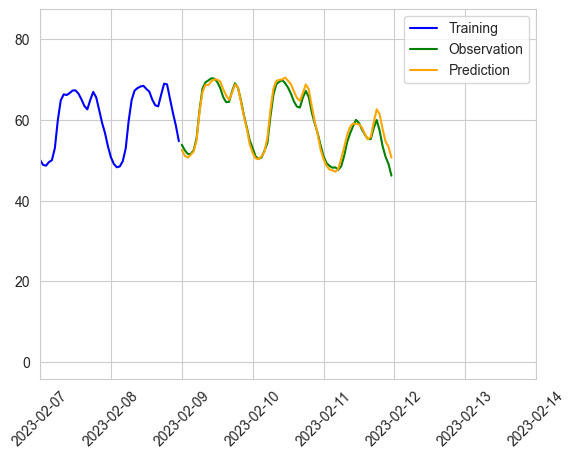

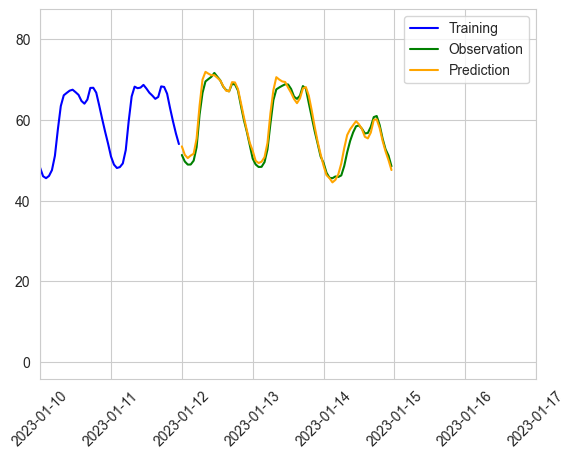

In [6]:
import pandas as pd
from datetime import timedelta

# Trainind Data start date
start_date = pd.to_datetime("2020-01-01")

# Define the thursdays (after the forecast wednesday). It will then be the end date of the training data
end_dates = ["2022-03-10","2022-02-10","2022-01-13","2023-03-09","2023-02-09","2023-01-12"]

residuals = []

for end_date in end_dates:
    end_date = pd.to_datetime(end_date)
    mask = (df.index >= start_date) & (df.index < end_date)
    y = df[mask]
    model = StatsForecastMSTL(season_length=[24,24*7, 24*364]) 
    fitted_model = model.fit(y=y) 
    
    y_pred = fitted_model.predict(fh=[i for i in range(1,73)]) 
    
    
    start_date_obs = end_date
    end_date_obs = start_date_obs + timedelta(days=3)
    
    mask = (df.index >= start_date_obs) & (df.index < end_date_obs)
    obs = df[mask]
    
    
    import matplotlib.pyplot as plt
    # y.index = y.index.to_timestamp()
    plt.plot(y, color='blue', label='Training')
    
    plt.plot(obs, color='green', label='Observation')
    plt.plot(y_pred, color='orange', label='Prediction')
    plt.legend()
    plt.xticks(rotation=45)
    plt.xlim(pd.to_datetime(end_date-timedelta(days=2)),pd.to_datetime(end_date+timedelta(days=5)))
    plt.show()
    
    res = obs - y_pred
    
    residuals.append(res)
    
    


<Axes: ylabel='Density'>

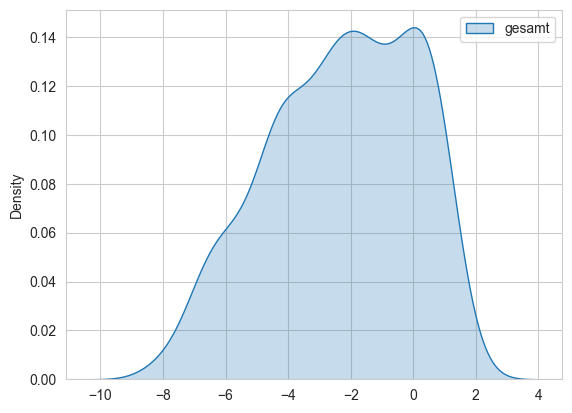

In [8]:
res_one_arr = pd.DataFrame()
for res in residuals:
    res_one_arr = pd.concat([res_one_arr, res])
# print(residuals_one_array)

sns.kdeplot(res_one_arr, fill=True)

In [9]:
print(res_one_arr.mean())
print(res_one_arr.var())

gesamt   -2.299663
dtype: float64
gesamt    5.415096
dtype: float64
